<a href="https://colab.research.google.com/github/Chandni0369/ML-LAB-D11ADA-57/blob/main/exp7/ML_epx7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# After upload, the file will be saved with its original name (e.g. housing.csv)
data = pd.read_csv("housing.csv")
print(data.head())

Saving housing.csv to housing.csv
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("housing.csv")

# Drop missing values
data = data.dropna()

# One-hot encode the categorical column ("ocean_proximity")
data = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data.drop("median_house_value", axis=1).values
y = data["median_house_value"].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term (x0 = 1)
X = np.c_[np.ones(X.shape[0]), X]

# Reshape target
y = y.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20433, 13)
Shape of y: (20433, 1)


In [5]:
# Mean Squared Error Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(error ** 2)
    return cost

In [6]:
# Initialize parameters
m, n = X.shape
theta = np.zeros((n, 1))   # initial weights
alpha = 0.01               # learning rate
epochs = 1000              # number of iterations

# Store cost values
cost_history = []

# Gradient descent loop
for i in range(epochs):
    gradients = (1/m) * X.T.dot(X.dot(theta) - y)
    theta -= alpha * gradients
    cost = compute_cost(X, y, theta)
    cost_history.append(cost)

print("Final parameters (showing first 5):")
print(theta[:5])
print("\nFinal cost:", cost_history[-1])

Final parameters (showing first 5):
[[206855.48256043]
 [-17439.33257441]
 [-16260.99908311]
 [ 14323.90743908]
 [  3739.43661463]]

Final cost: 2424039840.6099925


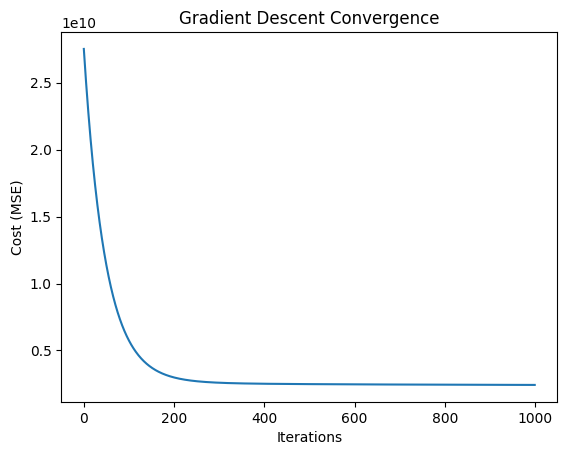

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

In [8]:
# Predict house price for the first row
sample = X[0].reshape(1, -1)
predicted_price = sample.dot(theta)

print("\nActual Price:", y[0])
print("Predicted Price:", predicted_price[0])


Actual Price: [452600.]
Predicted Price: [409585.58293223]
